<a href="https://colab.research.google.com/github/jlule/Machine_learning_module4/blob/main/Bike_rentals_Project_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [2]:
bikes.describe()

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
count,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000,16637.000000
mean,2.482058,11.547875,0.028671,0.684378,1.415580,0.624756,12.750436,15.723008,15.852141,36.471239,154.005770
std,1.085930,6.914199,0.166885,0.464777,0.637298,0.193227,8.168415,9.041349,11.322751,49.995203,151.319818
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-7.060000,-16.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,1.000000,0.470000,7.000000,7.980000,5.997800,4.000000,35.000000
50%,2.000000,12.000000,0.000000,1.000000,1.000000,0.620000,13.000000,16.440000,17.000000,17.000000,116.000000
75%,3.000000,18.000000,0.000000,1.000000,2.000000,0.780000,17.000000,23.020000,24.999200,50.000000,220.000000
max,4.000000,23.000000,1.000000,1.000000,4.000000,1.000000,57.000000,39.000000,50.000000,367.000000,886.000000


In [3]:
# create new feature 'total_users' combined casual and registered users
bikes['total_users'] = bikes['casual'] + bikes['registered']

In [4]:
bikes

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,total_users
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,16
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,40
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,32
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,13
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,11/30/12,4,19,0,1,1,0.66,0,7.04,7.0010,18,359,377
16633,11/30/12,4,20,0,1,1,0.66,0,7.04,7.0010,12,233,245
16634,11/30/12,4,21,0,1,1,0.75,6,6.10,5.0012,14,169,183
16635,11/30/12,4,22,0,1,1,0.75,0,6.10,5.9978,18,145,163


In [5]:
X = bikes.drop(columns=['casual', 'registered', 'dteday'])
y = bikes.registered

In [6]:
X

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,total_users
0,1,0,0,0,1,0.81,0,3.28,3.0014,16
1,1,1,0,0,1,0.80,0,2.34,1.9982,40
2,1,2,0,0,1,0.80,0,2.34,1.9982,32
3,1,3,0,0,1,0.75,0,3.28,3.0014,13
4,1,4,0,0,1,0.75,0,3.28,3.0014,1
...,...,...,...,...,...,...,...,...,...,...
16632,4,19,0,1,1,0.66,0,7.04,7.0010,377
16633,4,20,0,1,1,0.66,0,7.04,7.0010,245
16634,4,21,0,1,1,0.75,6,6.10,5.0012,183
16635,4,22,0,1,1,0.75,0,6.10,5.9978,163


In [7]:
#X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = bikes[bikes['dteday'].str.get(0) == "4"]
X_test = X_test.drop(columns=['casual', 'registered', 'dteday', 'total_users'])
 
X_train = bikes[bikes['dteday'].str.get(0) != "4"]
X_train = X_train.drop(columns=['casual', 'registered', 'dteday', 'total_users'])
 
y_test = bikes[bikes['dteday'].str.get(0) == "4"]
y_test = y_test.total_users
 
y_train = bikes[bikes['dteday'].str.get(0) != "4"]
y_train = y_train.total_users

In [8]:
X_test

,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
2067,2,0,0,1,3,1.00,11,4.22,1.0016
2068,2,1,0,1,3,1.00,11,4.22,1.0016
2069,2,2,0,1,3,0.93,13,4.22,1.0016
2070,2,3,0,1,2,0.93,17,3.28,-0.9982
2071,2,4,0,1,2,0.93,17,3.28,-0.9982
...,...,...,...,...,...,...,...,...,...
11534,2,19,0,1,2,0.64,17,17.38,18.0032
11535,2,20,0,1,2,0.59,13,16.44,17.0000
11536,2,21,0,1,2,0.59,13,16.44,17.0000
11537,2,22,0,1,2,0.55,11,16.44,17.0000


In [9]:
norm = MinMaxScaler().fit(X_train)

X_train = norm.transform(X_train)

X_test = norm.transform(X_test)

In [10]:
X_test

array([[0.33333333, 0.        , 0.        , ..., 0.19298246, 0.24489796,
        0.2576    ],
       [0.33333333, 0.04347826, 0.        , ..., 0.19298246, 0.24489796,
        0.2576    ],
       [0.33333333, 0.08695652, 0.        , ..., 0.22807018, 0.24489796,
        0.2576    ],
       ...,
       [0.33333333, 0.91304348, 0.        , ..., 0.22807018, 0.51020408,
        0.5       ],
       [0.33333333, 0.95652174, 0.        , ..., 0.19298246, 0.51020408,
        0.5       ],
       [0.33333333, 1.        , 0.        , ..., 0.26315789, 0.51020408,
        0.5       ]])

In [11]:
# activation options: sigmoid, relu
model = Sequential()
model.add(Dense(256, input_dim=len(X_train[0]), activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.4))
model.add(Dense(128, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(1))

In [12]:
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [13]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=27, validation_split=.35, batch_size=20, callbacks=[early_stop], shuffle=False)

hist = pd.DataFrame(history.history)

Epoch 1/27
494/494 [==============================] - 12s 21ms/step - loss: 12722.8301 - mse: 12722.8301 - val_loss: 35692.7148 - val_mse: 35692.7109
Epoch 2/27
494/494 [==============================] - 10s 20ms/step - loss: 11321.1152 - mse: 11321.1152 - val_loss: 33600.4336 - val_mse: 33600.4336
Epoch 3/27
494/494 [==============================] - 4s 7ms/step - loss: 9652.0586 - mse: 9652.0586 - val_loss: 33865.2500 - val_mse: 33865.2500
Epoch 4/27
494/494 [==============================] - 4s 8ms/step - loss: 8803.8535 - mse: 8803.8535 - val_loss: 31991.7441 - val_mse: 31991.7441
Epoch 5/27
494/494 [==============================] - 2s 4ms/step - loss: 8141.1895 - mse: 8141.1895 - val_loss: 30474.5117 - val_mse: 30474.5117
Epoch 6/27
494/494 [==============================] - 2s 4ms/step - loss: 7847.0269 - mse: 7847.0269 - val_loss: 31099.6836 - val_mse: 31099.6836
Epoch 7/27
494/494 [==============================] - 2s 4ms/step - loss: 7708.0283 - mse: 7708.0283 - val_loss: 276

1 Input / 1 Hidden / 1 Output layer =  43% Mini Holdout / 50% R2 score.

1 Input / 2 Hidden (with dropouts) / 1 Output = 78% Mini Holdout / 73% R2 Score

1 Input 2 Hidden (1 with D/O) / 1 Output = 43% Mini Holdout / 43% R2 Score

1 Input / 3 Hidden (with D/O) / 1 Output = 78% Mini Holdout / 72% R2 Score

In [14]:
hist

,loss,mse,val_loss,val_mse
0,12722.830078,12722.830078,35692.714844,35692.710938
1,11321.115234,11321.115234,33600.433594,33600.433594
2,9652.058594,9652.058594,33865.250000,33865.250000
3,8803.853516,8803.853516,31991.744141,31991.744141
4,8141.189453,8141.189453,30474.511719,30474.511719
5,7847.026855,7847.026855,31099.683594,31099.683594
6,7708.028320,7708.028320,27620.937500,27620.937500
7,7294.434082,7294.434082,26442.628906,26442.628906
8,7120.505859,7120.505859,27107.861328,27107.861328
9,6780.231934,6780.231934,26129.492188,26129.492188


In [15]:
hist = hist.reset_index()

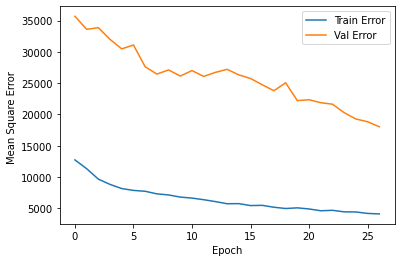

In [16]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [17]:
X_test

array([[0.33333333, 0.        , 0.        , ..., 0.19298246, 0.24489796,
        0.2576    ],
       [0.33333333, 0.04347826, 0.        , ..., 0.19298246, 0.24489796,
        0.2576    ],
       [0.33333333, 0.08695652, 0.        , ..., 0.22807018, 0.24489796,
        0.2576    ],
       ...,
       [0.33333333, 0.91304348, 0.        , ..., 0.22807018, 0.51020408,
        0.5       ],
       [0.33333333, 0.95652174, 0.        , ..., 0.19298246, 0.51020408,
        0.5       ],
       [0.33333333, 1.        , 0.        , ..., 0.26315789, 0.51020408,
        0.5       ]])

In [18]:
predictions = np.round(model.predict(X_test), 1)

45/45 [==============================] - 0s 2ms/step


In [19]:
predictions

array([[ 15.9],
       [ 13.9],
       [ 11.8],
       ...,
       [335. ],
       [269.4],
       [209. ]], dtype=float32)

In [20]:
result = mean_squared_error(y_test, predictions, squared=False)
result

118.47211795963392

In [21]:
r2 = r2_score(y_test, predictions)
r2

0.5719288424222226

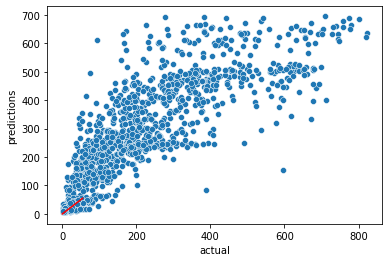

In [22]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

# Mini-Holdout Dataset

In [23]:
mini_holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv")
mini_holdout

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
0,12/1/2012,4,0,0,0,1,0.81,0,4.22,3.9980
1,12/1/2012,4,1,0,0,1,0.81,0,4.22,3.9980
2,12/1/2012,4,2,0,0,2,0.81,0,4.22,3.9980
3,12/1/2012,4,3,0,0,2,0.81,9,4.22,1.9982
4,12/1/2012,4,4,0,0,1,0.81,6,4.22,3.0014
5,12/1/2012,4,5,0,0,1,0.87,6,3.28,1.0016
6,12/1/2012,4,6,0,0,1,0.87,9,3.28,-0.0016
7,12/1/2012,4,7,0,0,2,0.87,9,3.28,-0.0016
8,12/1/2012,4,8,0,0,2,0.87,9,3.28,-0.0016
9,12/1/2012,4,9,0,0,2,0.93,17,4.22,-0.0016


In [24]:
# # one hot encode seasons
#mini_holdout['season'] = mini_holdout['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
#mini_holdout = pd.get_dummies(mini_holdout, columns=['season'], prefix='', prefix_sep='')

# # one hot encode weathers
#mini_holdout['weathersit'] = mini_holdout['weathersit'].map({1: 'clear', 2: 'cloudy', 3: 'rainy', 4: 'heavy weather'})
#mini_holdout = pd.get_dummies(mini_holdout, columns=['weathersit'], prefix='', prefix_sep='')

# create new feature 'total_users' combined casual and registered users
#mini_holdout['total_users'] = mini_holdout['casual'] + mini_holdout['registered']

mini_holdout = mini_holdout.drop(columns=['dteday'])

In [25]:
mini_holdout.to_numpy()

array([[ 4.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         1.00000e+00,  8.10000e-01,  0.00000e+00,  4.22000e+00,
         3.99800e+00],
       [ 4.00000e+00,  1.00000e+00,  0.00000e+00,  0.00000e+00,
         1.00000e+00,  8.10000e-01,  0.00000e+00,  4.22000e+00,
         3.99800e+00],
       [ 4.00000e+00,  2.00000e+00,  0.00000e+00,  0.00000e+00,
         2.00000e+00,  8.10000e-01,  0.00000e+00,  4.22000e+00,
         3.99800e+00],
       [ 4.00000e+00,  3.00000e+00,  0.00000e+00,  0.00000e+00,
         2.00000e+00,  8.10000e-01,  9.00000e+00,  4.22000e+00,
         1.99820e+00],
       [ 4.00000e+00,  4.00000e+00,  0.00000e+00,  0.00000e+00,
         1.00000e+00,  8.10000e-01,  6.00000e+00,  4.22000e+00,
         3.00140e+00],
       [ 4.00000e+00,  5.00000e+00,  0.00000e+00,  0.00000e+00,
         1.00000e+00,  8.70000e-01,  6.00000e+00,  3.28000e+00,
         1.00160e+00],
       [ 4.00000e+00,  6.00000e+00,  0.00000e+00,  0.00000e+00,
         1.00000e+00,  8.70000

In [26]:
mini_holdout = norm.transform(mini_holdout)
mini_predictions = np.round(model.predict(mini_holdout), 1)

2/2 [==============================] - 0s 5ms/step


In [27]:
result = mini_predictions.flatten()
result

array([ 69.3,  58.1,  46.4,  32.3,  25.9,  20.5,  21.5,  31. ,  62.5,
       103.8, 231.6, 389.8, 400.8, 448. , 460.2, 476.5, 460.2, 374.1,
       344.3, 266.1, 217.6, 154.4, 128.1, 121.3,  69.6,  57.9,  46.5,
        32.9,  23.7,  18.8,  16.8,  26.6,  64. , 141.2, 317.8],
      dtype=float32)

In [28]:
df = pd.DataFrame()
df['predictions'] = result
df

,predictions
0,69.300003
1,58.099998
2,46.400002
3,32.299999
4,25.900000
5,20.500000
6,21.500000
7,31.000000
8,62.500000
9,103.800003


In [29]:
from pathlib import Path
filepath = Path('Main/team1-module4-mini-predictions.csv')
filepath.parent.mkdir(exist_ok=True)
df.to_csv(filepath)

# Holdout Dataset

In [30]:
# Holdout
holdout_orignal = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')


In [31]:
# Drop tables
holdout_set = holdout_orignal.drop(columns=['dteday'])

In [32]:
holdout_set.to_numpy()

array([[ 4.    ,  0.    ,  0.    , ...,  0.    ,  4.22  ,  3.998 ],
       [ 4.    ,  1.    ,  0.    , ...,  0.    ,  4.22  ,  3.998 ],
       [ 4.    ,  2.    ,  0.    , ...,  0.    ,  4.22  ,  3.998 ],
       ...,
       [ 1.    , 21.    ,  0.    , ..., 11.    ,  4.22  ,  1.0016],
       [ 1.    , 22.    ,  0.    , ...,  9.    ,  4.22  ,  1.9982],
       [ 1.    , 23.    ,  0.    , ...,  9.    ,  4.22  ,  1.9982]])

In [33]:
holdout_set = norm.transform(holdout_set)
holdout_predictions = np.round(model.predict(holdout_set), 1)

24/24 [==============================] - 0s 2ms/step


In [34]:
result = holdout_predictions.flatten()
result

array([ 69.3,  58.1,  46.4,  32.3,  25.9,  20.5,  21.5,  31. ,  62.5,
       103.8, 231.6, 389.8, 400.8, 448. , 460.2, 476.5, 460.2, 374.1,
       344.3, 266.1, 217.6, 154.4, 128.1, 121.3,  69.6,  57.9,  46.5,
        32.9,  23.7,  18.8,  16.8,  26.6,  64. , 141.2, 317.8, 350.8,
       377. , 408.2, 421.6, 439.2, 462.6, 290.4, 412.8, 308. , 270.9,
       237.7, 199.2, 151.2,  16.7,  12.8,   9.4,   8. ,  13.4,  74. ,
       218. , 454.9, 533.9, 472.7, 387.7, 313.9, 250.2, 244.5, 245. ,
       247.7, 258.7, 398.7, 543.2, 590.1, 556.1, 466.6, 311.7, 244.1,
        16.7,  12.7,   9.7,   8.5,  10.8,  59.6, 170.5, 532.4, 511.6,
       455.6, 400.1, 320.2, 251.3, 236.1, 241.9, 241.5, 261.5, 385.4,
       535.8, 588.3, 575.9, 515. , 419.7, 311.3,  19.7,  15.2,   9.5,
         7.8,  21.1, 114.9, 158.5, 376.6, 469.8, 389.9, 324.3, 267.9,
       238.4, 237.9, 244. , 246.3, 266.5, 380.1, 477.3, 548.6, 385.7,
       328.7, 252.7, 186.6,  16.7,  12.5,   9.1,   7.5,  12.3,  71.3,
       200.2, 499.6,

In [35]:
df_holdout = pd.DataFrame()
df_holdout['predictions'] = result
df_holdout

,predictions
0,69.300003
1,58.099998
2,46.400002
3,32.299999
4,25.900000
...,...
737,178.300003
738,135.000000
739,117.900002
740,105.800003


In [36]:
from pathlib import Path
filepath = Path('D:\DS450 Fall 2022\module_4\team1-module4-final-predictions.csv')
filepath.parent.mkdir(parents=True,exist_ok=True)
df_holdout.to_csv(filepath)

In [37]:
from pathlib import Path  
filepath = Path('folder/subfolder/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 